In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Job_Placement_Data.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,percentage,work_experience,department,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,No,CSE,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Yes,ECE,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,No,CSE,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,No,CSE,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,No,CSE,Placed


In [4]:
df.shape

(215, 10)

In [5]:
df.isnull().sum()

gender             0
ssc_percentage     0
ssc_board          0
hsc_percentage     0
hsc_board          0
hsc_subject        0
percentage         0
work_experience    0
department         0
status             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           215 non-null    object 
 1   ssc_percentage   215 non-null    float64
 2   ssc_board        215 non-null    object 
 3   hsc_percentage   215 non-null    float64
 4   hsc_board        215 non-null    object 
 5   hsc_subject      215 non-null    object 
 6   percentage       215 non-null    float64
 7   work_experience  215 non-null    object 
 8   department       215 non-null    object 
 9   status           215 non-null    object 
dtypes: float64(3), object(7)
memory usage: 16.9+ KB


In [8]:
df['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [9]:
df.describe()

,ssc_percentage,hsc_percentage,percentage
count,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186
std,10.827205,10.897509,7.358743
min,40.890000,37.000000,50.000000
25%,60.600000,60.900000,61.000000
50%,67.000000,65.000000,66.000000
75%,75.700000,73.000000,72.000000
max,89.400000,97.700000,91.000000


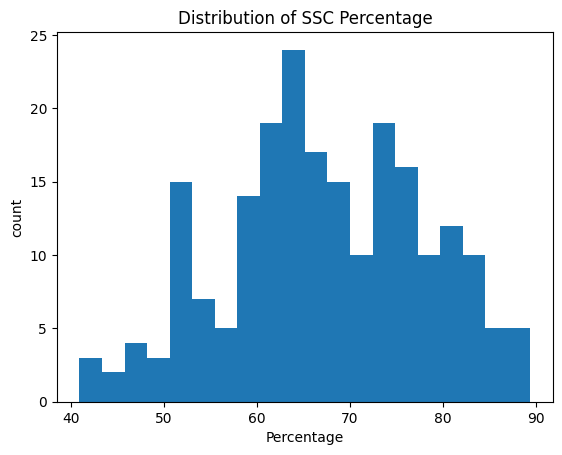

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['ssc_percentage'],bins=20)
plt.title("Distribution of SSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

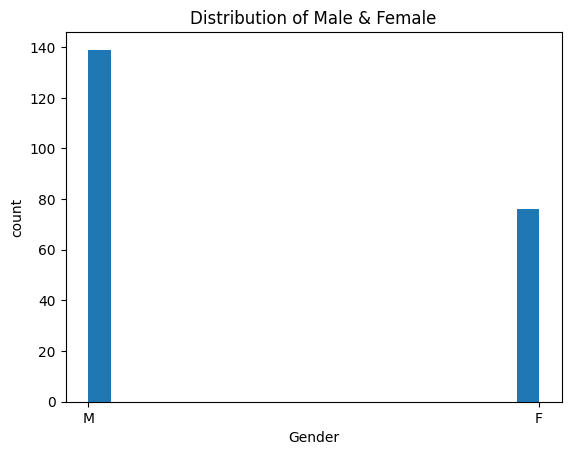

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['gender'],bins=20)
plt.title("Distribution of Male & Female")
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

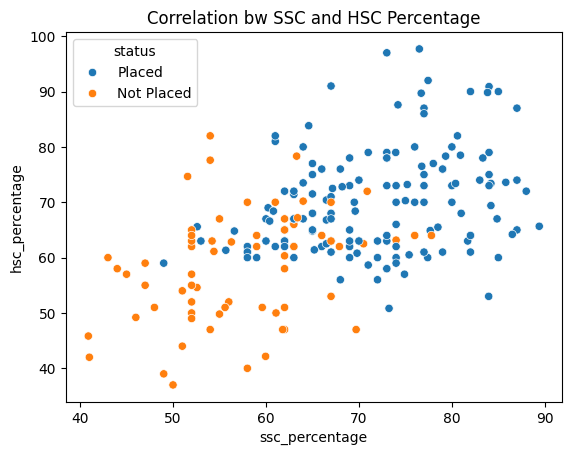

In [ ]:
sns.scatterplot(x='ssc_percentage',y='hsc_percentage',data=df,hue='status')
plt.title("Correlation bw SSC and HSC Percentage")
plt.show()

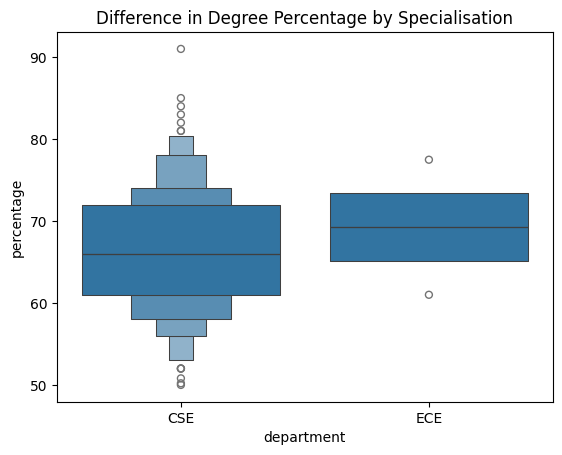

In [ ]:
sns.boxenplot(x='department',y='percentage',data=df)
plt.title('Difference in Degree Percentage by Specialisation')
plt.show()

In [ ]:
# Identify categorical columns (excluding numerical ones like percentages)
cat_cols = ['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'work_experience', 'department', 'status']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
df

,ssc_percentage,hsc_percentage,percentage,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,work_experience_Yes,department_ECE,status_Placed
0,67.00,91.00,58.00,True,True,True,True,False,False,False,True
1,79.33,78.33,77.48,True,False,True,False,True,True,True,True
2,65.00,68.00,64.00,True,False,False,False,False,False,False,True
3,56.00,52.00,52.00,True,False,False,False,True,False,False,False
4,85.80,73.60,73.30,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,True,True,True,True,False,False,False,True
211,58.00,60.00,72.00,True,True,True,False,True,False,False,True
212,67.00,67.00,73.00,True,True,True,True,False,True,False,True
213,74.00,66.00,58.00,False,True,True,True,False,False,False,True


In [ ]:
x = df.drop('status_Placed',axis=1)
y = df['status_Placed']

In [ ]:
print(x.shape,'\n\n',y.shape)

(215, 10) 

 (215,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(X_train.shape,'\n\n',X_test.shape)

(172, 10) 

 (43, 10)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Increase max_iter to 500 or higher
lg = LogisticRegression(max_iter=500)  # You can try 1000 if needed
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8837209302325582


In [ ]:
df.sample(5)

,ssc_percentage,hsc_percentage,percentage,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,work_experience_Yes,department_ECE,status_Placed
157,66.50,62.50,60.9,True,False,False,True,False,False,False,True
159,52.00,49.00,58.0,True,False,True,True,False,False,False,False
167,67.90,62.00,67.0,True,True,True,False,True,True,False,False
133,73.00,64.00,77.0,True,False,True,True,False,True,False,True
155,51.57,74.66,59.9,True,True,True,True,False,True,False,False


In [ ]:
input_data = (66,62,60,1,0,0,1,0,0,0)

np_df = np.asarray(input_data)
reshaped_df = np_df.reshape(1,-1)
pred = lg.predict(reshaped_df)
if pred[0] == 1:
    print("this person is placed for the job")
else:
    print("this person is not placed for the job")
    
    
import pickle
pickle.dump(lg,open('placement.pkl','wb'))

NameError: name 'np' is not defined